Linear regression is used to predict the value of an outcome variable Y based on one or more input predictor variables X. The aim is to establish a linear relationship (a mathematical formula) between the predictor variable(s) and the response variable

In [4]:
import numpy as np
import math
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import sklearn #for linear and other models
import warnings
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
%matplotlib inline


/home/sumindar/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
#two lists xs and ys
xs=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
ys=[23,24,25,26,27,28,29,30,34,45,46,51,56,57,58,62,64,67,72,75,77,81,84,83]
len(xs),len(ys)

(24, 24)

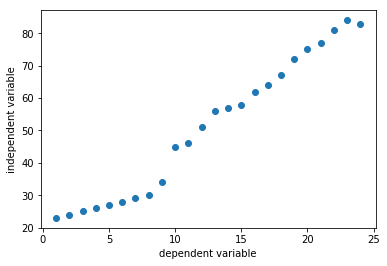

In [6]:
plt.scatter(xs,ys)
plt.ylabel("independent variable")
plt.xlabel("dependent variable")
plt.show()

In [7]:
#function for intercept and slope
def slope_intercept(x_val,y_val):
    x=np.array(x_val)
    y=np.array(y_val)
    m=(((np.mean(x)*np.mean(y))-np.mean(x*y))/(np.mean(x)*np.mean(x))-np.mean(x*x))
    m=round(m,2)
    b=(np.mean(y)-np.mean(x)*m)
    b=round(b,2)
    
    return m,b
slope_intercept(xs,ys)

(-205.08, 2614.5)

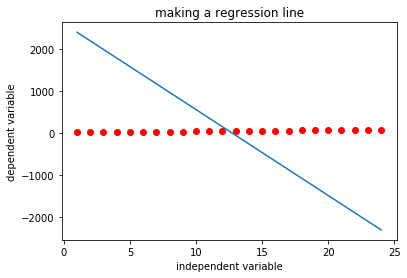

In [8]:
m,b=slope_intercept(xs,ys)
reg_line=[(m*x)+b for x in xs]
plt.scatter(xs,ys,color="red")
plt.plot(xs,reg_line)
plt.title("making a regression line")
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.show()

In [9]:
#rmse
import math
def rmsm(y1,y_h):
    y_actual=np.array(y1)
    y_pred=np.array(y_h)
    error=(y_actual-y_pred)**2
    error_mean=round(np.mean(error))
    err_sq=math.sqrt(error_mean)  
    return err_sq
rmsm(ys,reg_line)                    

1440.3301704817545

In [10]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

#special matplotlib argument for improved plots
from matplotlib import  rcParams
from sklearn.datasets import load_boston
boston=load_boston()
df_x=pd.DataFrame(boston.data,columns=boston.feature_names)#data frame for independent variables
df_y=pd.DataFrame(boston.target)#dependent variable



/home/sumindar/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
print(boston.keys())

['data', 'feature_names', 'DESCR', 'target']


In [12]:
df_x.head(13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [13]:
df_y.head(10)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [14]:
df_x.shape #tells number of rows and columns


(506, 13)

In [15]:
print(boston.data.shape)

(506, 13)


In [16]:
names=[i for i in list(df_x)]
names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [17]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [18]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [19]:
#In a dataset a training set is implemented to build up a model, while a test (or validation) set
#is to validate the model built.
regr=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=4)
#use 20% of total data for data test
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
138,0.24980,0.0,21.89,0.0,0.624,5.857,98.2,1.6686,4.0,437.0,21.2,392.04,21.32
251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
256,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11


In [20]:
#fit linear regression model to training data set
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
regr.intercept_

array([ 35.60325757])

In [23]:
#the coefficients
print("coefficients are:",regr.coef_)

('coefficients are:', array([[ -1.14743504e-01,   4.70875035e-02,   8.70282354e-03,
          3.23818824e+00,  -1.67240567e+01,   3.87662996e+00,
         -1.08218769e-02,  -1.54144627e+00,   2.92604151e-01,
         -1.33989537e-02,  -9.07306805e-01,   8.91271054e-03,
         -4.58747039e-01]]))


In [24]:
#mean squared error
print("mean squared error: ",np.mean((regr.predict(x_test)-y_test)**2))

('mean squared error: ', 0    25.407977
dtype: float64)


In [25]:
#variance score:1 is perfect prediction 
print("variance score:",regr.score(x_test,y_test))

('variance score:', 0.72647013796829429)


In [26]:
#coefficients of Independent variables (slope (m) of the regression line)
regr.coef_[0].tolist()

[-0.11474350352784292,
 0.04708750352305251,
 0.008702823544638971,
 3.2381882373524027,
 -16.724056662483488,
 3.876629957608199,
 -0.010821876932426422,
 -1.541446269218063,
 0.29260415086770986,
 -0.013398953732595587,
 -0.9073068048891137,
 0.008912710541206792,
 -0.45874703942843986]

In [27]:
#attach slopes to these variables
pd.DataFrame(zip(names,regr.coef_[0].tolist()),columns=['names','coefficients'])

,names,coefficients
0,CRIM,-0.114744
1,ZN,0.047088
2,INDUS,0.008703
3,CHAS,3.238188
4,NOX,-16.724057
5,RM,3.876630
6,AGE,-0.010822
7,DIS,-1.541446
8,RAD,0.292604
9,TAX,-0.013399


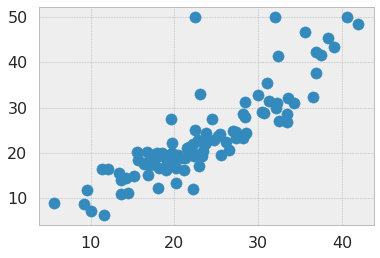

In [28]:
#plotting predicted x_test,y_test values
style.use("bmh")
plt.scatter(regr.predict(x_test),y_test)
plt.show()

In [29]:
#calculate p value
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
modedl1=sm.OLS(y_train,x_train)
result=modedl1.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     711.8
Date:                Sat, 25 Aug 2018   Prob (F-statistic):          8.37e-263
Time:                        11:30:21   Log-Likelihood:                -1210.8
No. Observations:                 404   AIC:                             2448.
Df Residuals:                     391   BIC:                             2500.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1077      0.039     -2.779      0.0

In [30]:
#select variables with p-values <0.5
model2=sm.OLS(y_train,x_train[['CRIM','ZN','CHAS','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']])
result2=model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     926.5
Date:                Sat, 25 Aug 2018   Prob (F-statistic):          1.08e-266
Time:                        11:30:22   Log-Likelihood:                -1212.1
No. Observations:                 404   AIC:                             2444.
Df Residuals:                     394   BIC:                             2484.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1040      0.039     -2.695      0.0

-------------------create a correlation plot-------------------


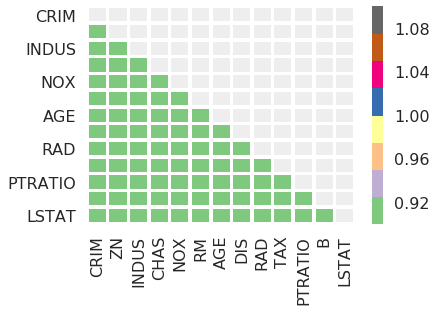

In [31]:
#deal with multicollinearity
import seaborn
corr_df=x_train.corr(method='pearson')
print("-------------------create a correlation plot-------------------")
#create a mask to display only lower triangle 
mask=np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)]=True
#create heatmap  using seaborn lib
#list if colormaps (parameter'cmap'is available)
seaborn.heatmap(corr_df,cmap='Accent',vmax=1.0,vmin=1.0,mask=mask,linewidths=2.5)
#show the plot
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()


In [32]:
print("----------------------------------------end----------------------------------------!!")

----------------------------------------end----------------------------------------!!
